In [2]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn_pandas
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('Data_inc.csv')

In [4]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [5]:
# Making sure that the data doesn't contain unecessary spaces
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [6]:
# print(df.isnull().sum())

In [7]:
 df.replace('?',np.NaN,inplace=True)

In [8]:
df.isna().sum()

Age                     0
Profession Class     1836
Final_census            0
 Education              0
 Education-num          0
 marital-status         0
 occupation          1843
 relationship           0
 race                   0
Gender                  0
 capital-gain           0
 capital-loss           0
 hours-per-week         0
 country              583
 income                 0
Unnamed: 15         32559
dtype: int64

In [9]:
#checking for missing values
cols=df.columns
mc=[]
a=df.isna().sum()
for i in range(15):
    if a[i]>0:
        mc.append(cols[i])

In [10]:
len(a)

16

In [11]:
mc

['Profession Class', ' occupation', ' country']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  30725 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       30718 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          31978 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [13]:
#df.iloc[:, 15] = df.iloc[:, 15].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  30725 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       30718 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          31978 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [15]:
 #As the columns which have missing values, they are only categorical, we'll use the Simpleimputer
# Importing the Simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [16]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [17]:
# Forward Fill (ffill) or Backward Fill (bfill) for imputing missing values 
df['Profession Class'].fillna(method='ffill', inplace=True)
df[' occupation'].fillna(method='bfill', inplace=True)
df[' country'].fillna(method='ffill', inplace=True)

In [18]:
#  The education column has a corresponding education-num column which has numerical values
df.drop(columns=[' Education'] ,inplace=True)

In [19]:
#Extracting categorical features
df1 = df.select_dtypes(include=['object']).copy()

In [20]:
df1.head()

,Profession Class,marital-status,occupation,relationship,race,Gender,country,income
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [21]:
df1.columns

Index(['Profession Class', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' country', ' income'],
      dtype='object')

In [22]:
df1[' income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [23]:
df1[' income'] = df1[' income'].map({'<=50K': 0, '>50K': 1})

In [24]:
# Using the dummy encoding to encode the categorical columns to numericsl ones
for col in df1.drop(' income',axis=1).columns:
    x=df1[col].head(1)
    df1= pd.get_dummies(df1, columns=[col], prefix = [col], drop_first=True)

In [25]:
df1.head()

,income,Profession Class_Local-gov,Profession Class_Never-worked,Profession Class_Private,Profession Class_Self-emp-inc,Profession Class_Self-emp-not-inc,Profession Class_State-gov,Profession Class_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#extracting the numerical columns 
num_df = df.select_dtypes(include=['int64']).copy()

In [27]:
num_df.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df)

In [30]:
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns)

In [31]:
scaled_num_df.head()


,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [32]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([scaled_num_df,df1], axis=1)

In [33]:
final_df.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Profession Class_Local-gov,Profession Class_Never-worked,Profession Class_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# separating the feature and target columns
x=final_df.drop(' income',axis=1)
y=final_df[' income']

If we plot the distribution of the target column, we'd find that the peole with less than 50K annual income are more in number than the people with an annual income greaterthan 50K


(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

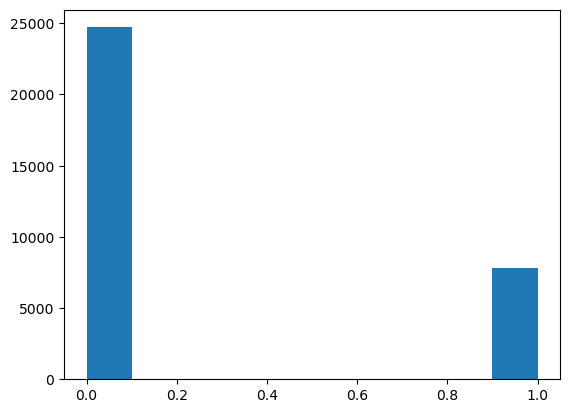

In [35]:
plt.hist(y)

The dataset seems to be imbalanced we would have to perform random sampling  to makee it balanced 

In [36]:
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x,y)


(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

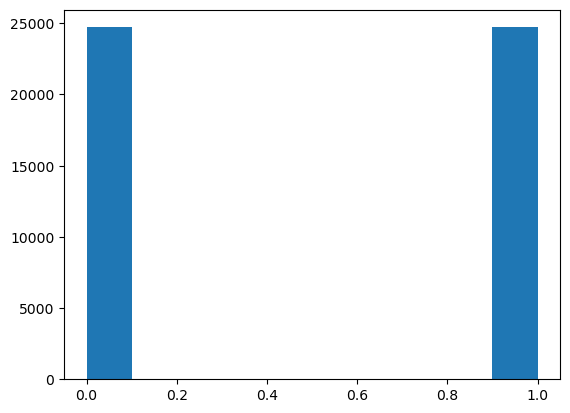

In [37]:
plt.hist(y_resampled)

In [38]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_resampled,y_resampled, random_state=355 )

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
gnb = GaussianNB(priors=None, var_smoothing=0.05)

In [40]:
y_pred = gnb.fit(train_x, train_y).predict(test_x)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
sc=accuracy_score(test_y,y_pred)
sc

0.8092233009708738

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

In [45]:
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [46]:
grid.fit(train_x, train_y)


Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.683 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.683 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.676 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.691 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.683 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.807 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.808 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.808 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.806 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.806 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.781 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;

[CV 1/5] END ...............var_smoothing=1e-08;, score=0.690 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.691 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.685 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.696 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.691 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.697 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.698 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.694 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-07;, score=0.704 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.700 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-06;, score=0.704 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-06;, score=0.710 total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5, estimator=GaussianNB(var_smoothing=0.05),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [47]:
grid.best_estimator_

GaussianNB(var_smoothing=0.05)

In [48]:
GaussianNB(priors=None, var_smoothing=0.05)

GaussianNB(var_smoothing=0.05)

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [50]:
# Assuming train_x, train_y are your training features and labels
# Replace NaN with a specific value if NaN is not used to represent missing values
train_x.fillna(value=np.nan, inplace=True)

xgb = XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0,
    learning_rate=0.1, max_delta_step=0, max_depth=9,
    min_child_weight=1, missing=np.nan,  # Set to the value that represents missing
    n_estimators=130, n_jobs=1, nthread=None,
    objective='binary:logistic', random_state=0, reg_alpha=0,
    reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
    subsample=1, verbosity=1
)

# Fit the model
xgb.fit(train_x, train_y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=9,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=130,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [51]:
ac2=accuracy_score(test_y,y_pred)
ac2


0.8092233009708738

In [52]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [53]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\DEVASHISH\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [10:56:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=9, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=130,
                                     n_jobs=1, nthread=None,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [54]:
grid_result = grid.fit(train_x, train_y)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\DEVASHISH\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [10:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 130}
Best Accuracy:  0.8731121898597627


In [55]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=130,
              n_jobs=1, nthread=None, ...)

In [56]:
best_xgb_model = grid.best_estimator_
predictions = best_xgb_model.predict(test_x)

In [57]:
# Assuming 'Predicted_Income' is the column with predicted values in the test set
predictions = best_xgb_model.predict(test_x)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Actual_Income': test_y,  # Assuming 'test_y' contains the actual labels
    'Predicted_Income': predictions
})

# Map the predicted values to human-readable labels
predictions_df['Predicted_Income_Label'] = predictions_df['Predicted_Income'].map({1: 'Above 50000', 0: 'Below or equal to 50000'})

# Export the predictions DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)
